<a href="https://colab.research.google.com/github/ViniciusMangueira/Data_Science/blob/main/Covid_19%2C_Mundo_e_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID-19 MUNDO E BRASIL

<center><image src="https://www.pfizer.com.br/sites/default/files/inline-images/covid-19_0.jpg"></center>

O famigerado Coronavírus é uma família de vírus que causa infecções respiratórias cujos sintomas variam desde manifestações leves, como perda de olfato e paladar, até quadros mais graves, que provocam falta de ar e podem levar à morte.

O coronavírus pode ser transmitido das seguintes formas:
*	Por vias respiratórias: através do ar e de gotículas provenientes de espirros, tosse e fala de indivíduos infectados.
*	Por contato físico direto: através de beijos, abraços e outros tipos de toque.
*	Por contato com superfícies contaminadas: através do compartilhamento de utensílios e ferramentas ou toque em maçanetas, corrimões e outros objetos.

Normalmente, o período médio que os primeiros sintomas levam para aparecer desde a infecção é de 14 dias, além disso uma pessoa com COVID-19 pode transmitir o vírus por até 14 dias após sua recuperação. Além disso, segundo dados da Organização Mundial da Saúde (OMS), cerca de 80% das pessoas com COVID-19 podem ser assintomáticos ou desenvolver poucos sintomas da doença. 

Por outro lado, alguns grupos de pessoas possuem uma chance maior de terem efeitos mais graves causados pelo covid-19. Nessa categoria, enquadram-se:
*	Idosos
*	Pessoas com doenças respiratórias, como asma e bronquite
*	Fumantes (tabagismo)
*	Pessoas com diabetes
*	Pessoas com hipertensão
*	Pacientes com HIV
*	Doentes cardíacos
*	Pacientes imunodeprimidos
*	Pessoas com obesidade

Vemos abaixo uma lista da letalidade do vírus:

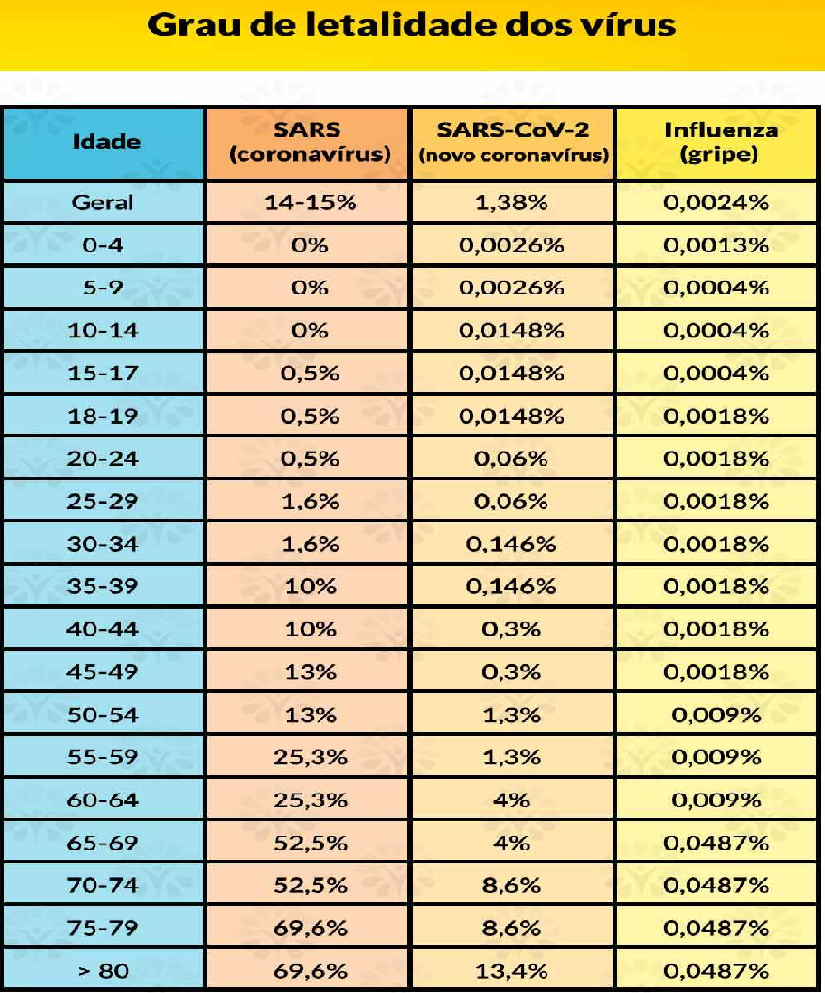

Por fim, como podemos nos proteger contra o novo coronavírus? 

Segue a lista de afazeres:
*	Lavar as mãos com água e sabão frequentemente (até a altura dos punhos).
*	Higienizar as mãos sempre que possível com álcool gel 70%.
*	Mesmo com as mãos limpas, evitar tocar olhos, nariz e boca.
*	Uso de máscaras e proteção facial.
*	Não compartilhar objetos de uso pessoal, como talheres, pratos, copos ou garrafas.
*	Manter os ambientes bem ventilados.
*	Limpar regularmente o ambiente e superfícies comuns, como móveis, maçanetas e corrimão.
*	Manter 1 metro de distância entre as pessoas em locais públicos ou de convívio.




## Objetivo

O objetivo do trabalho é ver como foi a expansão da covid e tentar achar padrões. Dessa forma, vamos analisar separadamente os anos de 2020 e 2021. 

Em 2020, vamos ver o crescimento dos casos além de outros dados importantes.

Na sequência, faremos observações sobre o surgimento da vacina e a quantidade da população que está sendo vacinada, para que, por fim, façamos uma comparação do último dia de 2020 com o dia 31 de janeiro para vermos, como um mês após a introdução da vacina afetou o número de casos.

Além disso, faremos uma análise especial para o Brasil.


## Importação dos dados

Inicialmente, vamos importar as bibliotecas e o nosso arquivo.

Posteriormente, vamos ver a quantidade de entradas e atributos do dataset e ver os tipos dos atributos.

In [ ]:
# Importar Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importar arquivo
df = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")

In [ ]:
# Formato do arquivo
print('O arquivo tem {} entradas e {} atributos!'.format(df.shape[0], df.shape[1]))

O arquivo tem 68533 entradas e 59 atributos!


In [ ]:
# Tipos dos atributos
df.dtypes

iso_code                                  object
continent                                 object
location                                  object
date                                      object
total_cases                              float64
new_cases                                float64
new_cases_smoothed                       float64
total_deaths                             float64
new_deaths                               float64
new_deaths_smoothed                      float64
total_cases_per_million                  float64
new_cases_per_million                    float64
new_cases_smoothed_per_million           float64
total_deaths_per_million                 float64
new_deaths_per_million                   float64
new_deaths_smoothed_per_million          float64
reproduction_rate                        float64
icu_patients                             float64
icu_patients_per_million                 float64
hosp_patients                            float64
hosp_patients_per_mi

## Análise inicial 

### Entradas

Antes de começarmos as análises, vamos olhar as 5 primeiras e as 5 últimas entradas do nosso dataset.

In [ ]:
# Visualizar as 5 primeiras entradas
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [ ]:
# Visualizar as 5 últimas entradas
df.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
68528,ZWE,Africa,Zimbabwe,2021-02-08,34658.0,106.0,158.571,1339.0,13.0,15.000,2331.842,7.132,10.669,90.090,0.875,1.009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2557.0,339110.0,22.816,0.172,2631.0,0.177,0.060,16.6,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.26,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
68529,ZWE,Africa,Zimbabwe,2021-02-09,34781.0,123.0,138.143,1353.0,14.0,14.143,2340.118,8.276,9.294,91.032,0.942,0.952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2447.0,341557.0,22.980,0.165,2386.0,0.161,0.058,17.3,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
68530,ZWE,Africa,Zimbabwe,2021-02-10,34864.0,83.0,128.571,1364.0,11.0,13.571,2345.702,5.584,8.650,91.772,0.740,0.913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
68531,ZWE,Africa,Zimbabwe,2021-02-11,34864.0,0.0,99.000,1364.0,0.0,10.857,2345.702,0.000,6.661,91.772,0.000,0.730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
68532,ZWE,Africa,Zimbabwe,2021-02-12,35045.0,181.0,102.000,1393.0,29.0,12.857,2357.880,12.178,6.863,93.723,1.951,0.865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


###Tranformar em datetime

Anteriormente, verificamos que a coluna date não está em formato datetime. 

Para que possamos explorar essa variável, vamos transformá-la para o formato datetime.

In [ ]:
# transformando a coluna data em datetime
df.date = pd.to_datetime(df.date)
df.date = pd.to_datetime(df.date, format="%Y-%m-%d")

In [ ]:
# verificando a data mais recente do dataset
df.date.max()

Timestamp('2021-02-12 00:00:00')

Ou seja, nosso dataset tem até o dia 12/02/2021.

### Criação de novas colunas e de subdatasets

Agora, vamos adicionar duas colunas no dataset, uma delas contendo o mês do registro e a outro com o ano do registro. 

Posteriormente, vamos criar um subdataset com os dados de 2020 e um para os dados de 2021 para facilitar nossas análises no futuro.

Por fim, criaremos também um subdataset com os dados que tem a localização igual a “Mundo”, pois nele estão contidas todas as informações do dia no mundo, desta forma, no futuro os dados vão ser necessários.


In [ ]:
# Adicionar as colunas me e ano no df
df['mes'] = df.date.dt.month
df['ano'] = df.date.dt.year

In [ ]:
#Criar subdatasets para separar os dados de 2020 e 2021
df_2020 = df[df['ano']==2020]
df_2021 = df[df['ano']==2021]

In [ ]:
# Criar subdatasets para o Mundo nos anos de 2020 e 2021
df_world_2020 = df_2020[df_2020.location == 'World'].sort_values(by="total_cases", ascending=False)
df_world_2021 = df_2021[df_2021.location == 'World'].sort_values(by="total_cases", ascending=False)

In [ ]:
# Verficar os dados do ultimo dia de 2020
df_2020.sort_values(by="total_cases", ascending=False).head(1)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,mes,ano
67518,OWID_WRL,NaN,World,2020-12-31,83521001.0,722976.0,579679.0,1820019.0,13076.0,10857.571,10714.966,92.751,74.367,233.491,1.678,1.393,1.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9882296.0,5373135.0,NaN,3288475.0,911752.0,0.13,0.07,NaN,117.0,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737,12,2020


Vemos então que ao fim de 2020 foram 83521001 casos e 1819931.0, o que da uma taxa de mortalidade de 2,1%!

In [ ]:
# analisar total de casos ao fim de janeiro
df_2021[df_2021.mes == 1].sort_values(by="total_cases", ascending=False).head(1)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,mes,ano
67549,OWID_WRL,NaN,World,2021-01-31,102967087.0,382272.0,535650.143,2229392.0,7951.0,14024.714,13209.717,49.042,68.719,286.01,1.02,1.799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99609596.0,55137082.0,11020827.0,4241919.0,4692589.0,1.28,0.71,0.14,602.0,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737,1,2021


Fazendo a comparação, temos que no fim de janeiro de 2021 tivemos mais 19.446.086 casos no mundo e mais 409.373 mortes do que no final de 2020.

### Dados Faltantes

Nesse momento, estaremos interessados em ver se existem dados faltantes e a sua quantidade no dataset.

In [ ]:
# Conferir a quantidade de dados faltantes 
df.isnull().sum().sort_values(ascending=False)

weekly_icu_admissions_per_million      67846
weekly_icu_admissions                  67846
people_fully_vaccinated_per_hundred    67601
people_fully_vaccinated                67601
weekly_hosp_admissions                 67397
                                       ...  
location                                   0
ano                                        0
date                                       0
mes                                        0
iso_code                                   0
Length: 61, dtype: int64

In [ ]:
# Conferir a quantidade de dados faltantes em porcentagem
df.isnull().sum().sort_values(ascending=False) / df.shape[0]

weekly_icu_admissions_per_million      0.989976
weekly_icu_admissions                  0.989976
people_fully_vaccinated_per_hundred    0.986401
people_fully_vaccinated                0.986401
weekly_hosp_admissions                 0.983424
                                         ...   
location                               0.000000
ano                                    0.000000
date                                   0.000000
mes                                    0.000000
iso_code                               0.000000
Length: 61, dtype: float64

Notamos que existem uma boa quantidade de de atributos que possuem mais de 87% dos seus dados faltantes. No entanto, para alguns fazem sentindo, pois como sabemos a vacina chegou no mundo em dezembro de 2020, então não existem dados antes de dezembro. Por isso, não iremos excluir as colunas que possuem 87% ou mais dos dados faltantes.

### Verificar a presenca de Outliers

Por último, iremos visualizar se existem outliers no nosso dataset.

In [ ]:
# Ver estatisticas do dataset
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,mes,ano
count,6.774900e+04,67747.000000,66746.000000,5.884600e+04,59004.000000,66746.000000,67377.000000,67375.000000,66379.000000,58487.000000,58645.000000,66379.000000,51295.000000,7317.000000,7317.000000,8699.000000,8699.000000,687.000000,687.000000,1136.000000,1136.000000,3.113500e+04,3.093600e+04,30936.000000,31135.000000,3.518400e+04,35184.000000,33483.000000,32971.000000,1.879000e+03,1.545000e+03,9.320000e+02,1.567000e+03,2.720000e+03,1879.000000,1545.000000,932.000000,2720.000000,58775.000000,6.815200e+04,64084.000000,62477.000000,61755.000000,62124.000000,62612.000000,42798.000000,63219.000000,63993.000000,49807.000000,49124.000000,31692.000000,57978.000000,65129.000000,63204.000000,68533.000000,68533.000000
mean,5.514064e+05,5062.928012,5078.604163,1.707501e+04,129.803522,112.800163,6424.344073,63.039193,62.977377,156.850132,1.350180,1.172285,1.030927,1000.427771,21.505626,5052.915278,145.820843,269.209789,15.262504,2694.062585,97.291785,3.675888e+04,4.102075e+06,143.010642,1.352734,3.555212e+04,1.300610,0.084978,161.504185,3.009230e+06,2.238724e+06,7.217736e+05,1.824891e+05,1.155235e+05,4.509276,3.805437,1.363433,1893.967647,59.066599,1.325372e+08,323.511627,30.591432,8.821299,5.592602,19146.987762,13.221078,256.780307,7.784761,10.567404,32.649033,51.065186,3.039640,73.135877,0.728391,6.684473,2020.127282
std,3.908817e+06,32259.793694,32010.596223,9.861698e+04,716.780519,647.394282,12844.312990,165.707874,138.722177,282.386078,3.892605,2.773915,0.363442,2801.099505,24.535869,13907.734483,187.315328,513.892049,29.184172,6078.392718,224.403975,1.458693e+05,1.910934e+07,291.437176,3.471148,1.346900e+05,2.615558,0.098635,832.625088,1.322586e+07,8.122290e+06,2.473546e+06,7.692504e+05,4.823723e+05,9.664439,7.438678,3.713444,3613.003671,22.197827,7.023057e+08,1572.114865,9.119853,6.250665,4.269853,19658.006141,19.899752,118.240993,3.916207,10.414968,13.459470,31.771025,2.469427,7.548979,0.150149,3.443843,0.333291
min,1.000000e+00,-46076.000000,-1121.714000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2153.437000,-276.825000,0.001000,-76.445000,-10.921000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.391720e+05,1.000000e+00,0.000000,-6.320000,0.000000e+00,0.000000,0.000000,1.600000,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,8.090000e+02,0.137000,15.100000,1.144000,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,1.000000,2020.000000
25%,6.410000e+02,1.000000,5.286000,3.400000e+01,0.000000,0.000000,123.662000,0.118000,0.924000,5.132000,0.000000,0.000000,0.870000,19.000000,2.988000,75.000000,15.975000,5.006000,1.176000,32.457000,6.890500,1.250000e+03,9.307300e+04,7.495750,0.099000,1.317000e+03,0.099000,0.014000,8.200000,2.576300e+04,2.477300e+04,7.125500e+03,1.997500e+0

Pelas estatísticas acima, podemos inferir as seguintes afirmações: 

* Existem dados negativos. 

* Existem alguns outliers como, por exemplo, o máximo de ‘new_cases’ tem o valor 858062 enquanto 75% do dataset tem o valor de 631. 


No entanto, existem explicações. 

* Para o caso dos valores negativos, eles significam que quando a organização que registrou os dados, registrava dados a mais, no outro dia eles subtraiam para ter um valor mais aproximado do da realidade. Dessa forma, não vamos excluir os dados negativos, pois eles fazem sentido e são importantes! 

* Por outro lado, os outliers são os dados que possuem localização igual a “Mundo ”, assim como já separamos esses dados em subdataframes vamos exclui-los.Para isso, iremos transformar o atributo location no index e depois excluir os dados World.


In [ ]:
# Transformar a coluna location no index
df_2020.set_index('location', inplace=True)
df_2021.set_index('location', inplace=True)

In [ ]:
# Excluindo os dados do mundo
df_2020 = df_2020.drop("World")
df_2021 = df_2021.drop("World")

## Análise do Mundo em 2020



Como vimos, o dia mais recente a ser registrado foi 11-02-2021. Vamos ver  algumas estatísticas dos maiores valores atingidos durante a pandemia até esse dia. 

In [ ]:
print('O número total de casos registrados foi de {:.0f} casos!'.format(df.total_cases.max()))
print('O número máximo de mortes registradas foi de {:.0f} mortes!'.format(df.total_deaths.max()))
print('O número máximo de descobertas de novos casos em um dia foi de {:.0f} casos!'.format(df_world_2020.new_cases.max()))
print('O número máximo de mortes em um único dia foi de {:.0f} casos!'.format(df_world_2020.new_deaths.max()))

O número total de casos registrados foi de 108188977 casos!
O número máximo de mortes registradas foi de 2383000 mortes!
O número máximo de descobertas de novos casos em um dia foi de 759831 casos!
O número máximo de mortes em um único dia foi de 15251 casos!


O que são dados assustadores. 

Agora, como diria o poeta, “vamos começar pelo começo”.

Então, a primeira coisa que vamos analisar são os dados de 2020.

### Quantidade de Casos / Mortes

Em 2020 queremos analisar muitas coisas, desde como foi o crescimento do número de casos e mortes, comparando esses números em cada continente, até análise das mortes com relação ao IDH e expectativa de vida do País. Visto isso, vamos dar uma olhada também nas informações dos hospitais.

In [ ]:
print('O número total de casos registrados em 2020 foi de {:.0f} casos!'.format(df_world_2020.total_cases.values[0]))

O número total de casos registrados em 2020 foi de 83521001 casos!


Abaixo, investigaremos o total de novos casos por mês em 2020.

No mês de dezembro de 2020 tivemos o maior número de novos casos, com 42530807 casos!


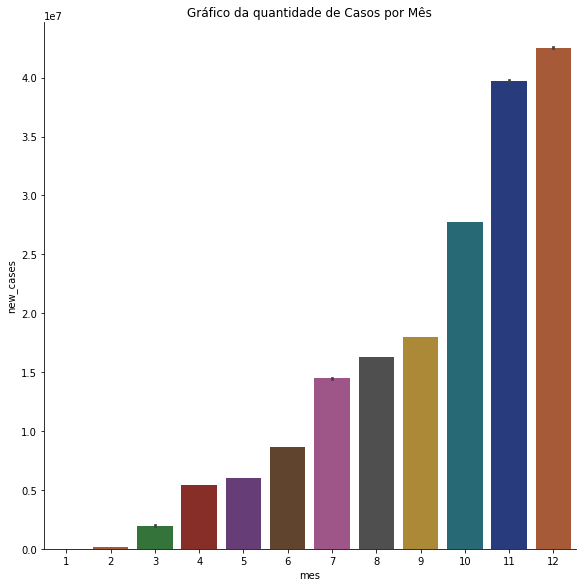

In [ ]:
# Casos por mes 
print('No mês de dezembro de 2020 tivemos o maior número de novos casos, com {:.0f} casos!'.format(df_2020[df_2020['mes']==12].new_cases.sum())) 
sns.catplot(x="mes", y="new_cases", estimator=sum ,kind="bar",ci="sd", palette="dark", alpha=.9, height=8, data=df_2020); 
plt.title('Gráfico da quantidade de Casos por Mês');

Pelo gráfico acima, é nítido o crescimento gigantesco da quantidade de casos com o passar do tempo em 2020, principalmente,  se compararmos os meses de setembro e dezembro.

A seguir, veremos a quantidade de mortes por mês.

In [ ]:
print('O número total de mortes registradas em 2020 foi de {:.0f} mortes!'.format(df_world_2020.total_deaths.values[0]))

O número total de mortes registradas em 2020 foi de 1820019 mortes!


No mês de dezembro de 2020 tivemos o maior número de mortes, com 803582 mortes!!


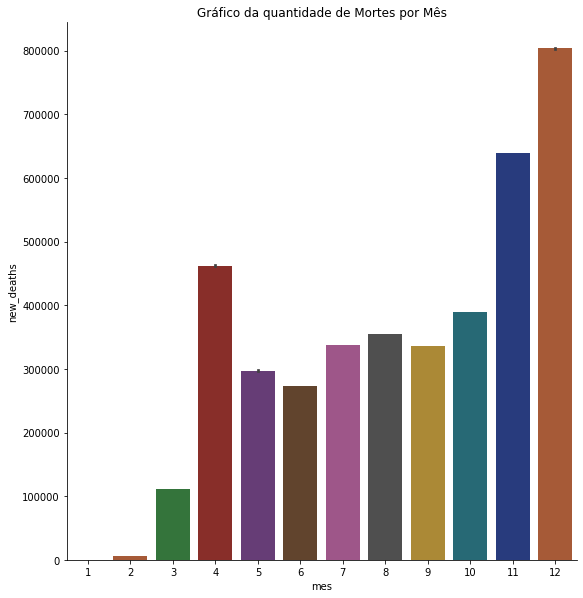

In [ ]:
# Mortes por mes
print('No mês de dezembro de 2020 tivemos o maior número de mortes, com {:.0f} mortes!!'.format(df_2020[df_2020['mes']==12].new_deaths.sum())) 
sns.catplot(x="mes", y="new_deaths", estimator=sum ,kind="bar", ci="sd", palette="dark", alpha=.9, height=8, data=df_2020);
plt.title('Gráfico da quantidade de Mortes por Mês');

O gráfico é muito interessante para ser analisado, pois embora a quantidade de casos tenha crescido constantemente (como vimos no gráfico anterior), vemos que o mês de abril teve um número maior de mortes do que maio, junho, julho, agosto, setembro e outubro.

Fato interessante, mas totalmente explicável. O motivo? A declaração oficial que a covid tinha virado pandemia, veio em meados de março e com ela vieram também lockdown no mundo assim como as campanhas intensivas de conscientização, com isso ainda não estávamos (população e o estado) tão preparados para conter o vírus. Com o tempo, vemos que as medidas surtiram efeito, porém com o aumento gigantesco do número de ocorrências em novembro e dezembro a quantidade de mortes voltou a crescer.


Visto isso, vamos analisar como ficaram os hospitais durante o ano de 2020.

### Hospitais:

Acabamos de verificar a quantidade de casos/mortes no mundo. 

Nesse momento, queremos investigar como os Hospitais ficaram no ano de 2020.

Começaremos vendo o total de camas de hospitais por milhão de pessoas em cada mês de 2020.

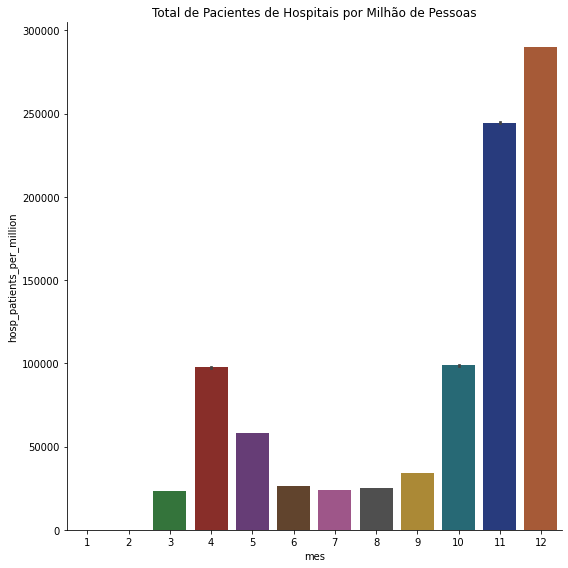

In [ ]:
# Total de Pacientes de Hospitais por Milhão de Pessoas
sns.catplot(x="mes", y="hosp_patients_per_million", estimator=sum ,kind="bar", ci="sd", palette="dark", alpha=.9, height=8, data=df_2020);
plt.title('Total de Pacientes de Hospitais por Milhão de Pessoas');
plt.tight_layout()
plt.show()

Constatamos então que o gráfico acima, é muito parecido com a quantidade de mortes, vendo que abril teve um pico, em sequência os números baixaram, porém voltaram a subir em outubro.

Em seguida, vamos visualizar o gráfico do Total de Pacientes dos UTIS dos Hospitais por Milhão de Pessoas por mês. 

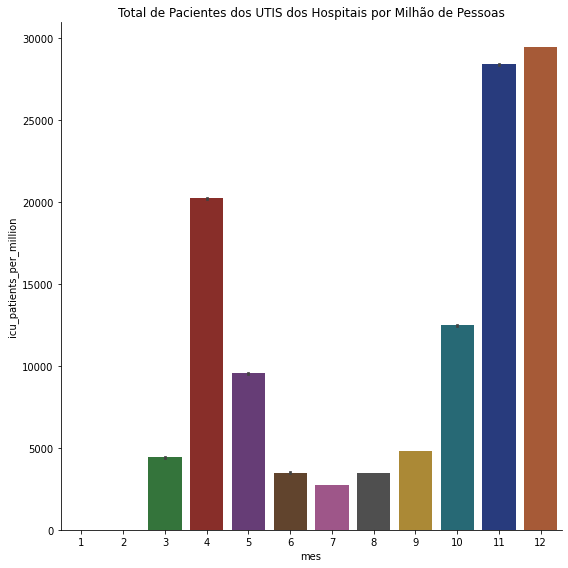

In [ ]:
#Total de Pacientes dos UTIS dos Hospitais por Milhão de Pessoas
sns.catplot(x="mes", y="icu_patients_per_million", estimator=sum, kind="bar", ci="sd", palette="dark", alpha=.9, height=8, data=df_2020);
plt.title('Total de Pacientes dos UTIS dos Hospitais por Milhão de Pessoas');
plt.tight_layout()
plt.show()

Por fim, vamos visualizar o gráfico do Total de Camas de Hospitais por Mil Pessoas. 

Com ele, podemos ver que desde março, o número de camas disponibilizadas por mês ficou muito parecida.

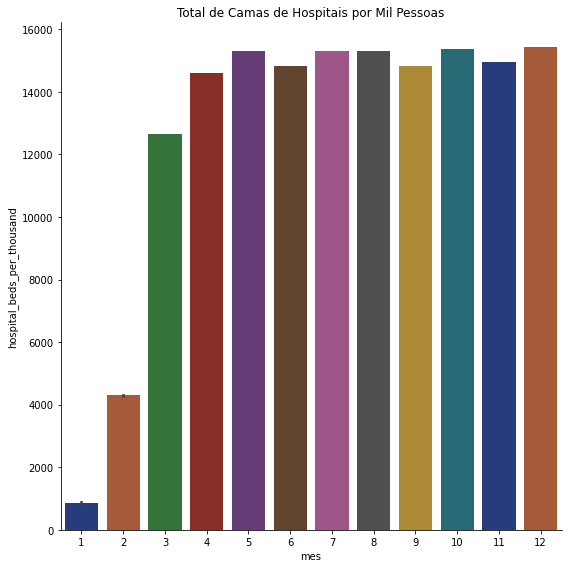

In [ ]:
#Total de Camas de Hospitais por Mil Pessoas
sns.catplot(x="mes", y="hospital_beds_per_thousand", estimator=sum ,kind="bar", ci="sd", palette="dark", alpha=.9, height=8, data=df_2020);
plt.title('Total de Camas de Hospitais por Mil Pessoas');
plt.tight_layout()
plt.show()

### Análise Geográfica:  


#### Por Continente:

Nesse momento, vamos investigar como ficou a distribuição da quantidade de casos/mortes por continentes. 

Ao fim de 2020, a Europa teve o maior número de casos, com 23807143 casos!


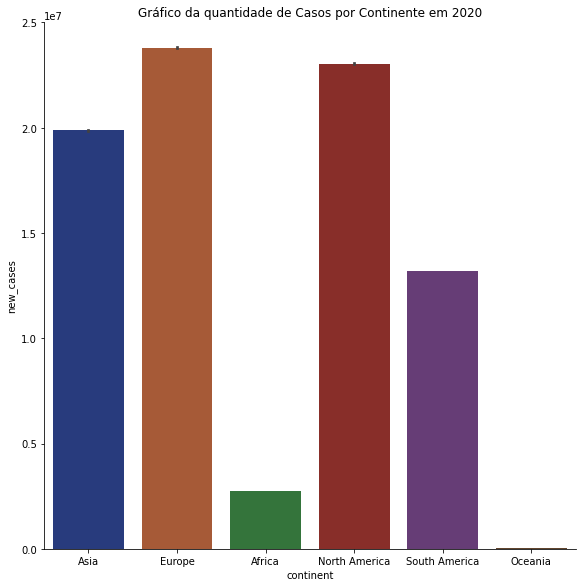

In [ ]:
# Total de casos de 2020 em cada continente
print('Ao fim de 2020, a Europa teve o maior número de casos, com {:.0f} casos!'.format(df_2020[df_2020['continent']=='Europe'].new_cases.sum())) 
sns.catplot(x="continent", y="new_cases", estimator=sum ,kind="bar", ci="sd", palette="dark", alpha=.9, height=8, data=df_2020);
plt.title('Gráfico da quantidade de Casos por Continente em 2020');

Ao fim de 2020, a Europa teve o maior número de mortes por covid, com 545487 casos!


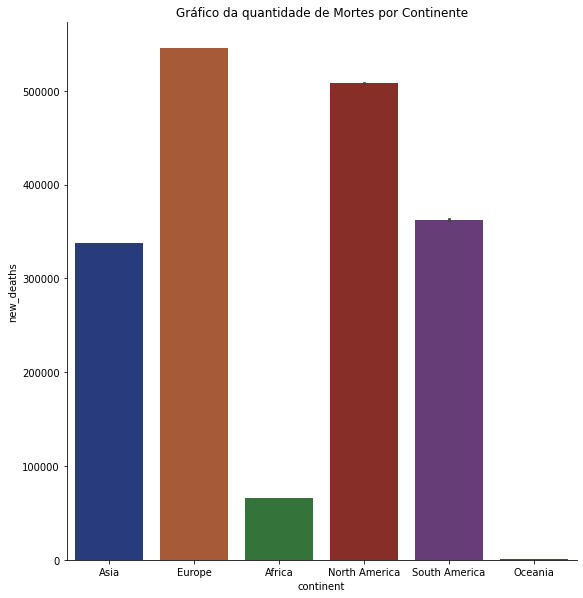

In [ ]:
# Total de casos de 2020 em cada continente
print('Ao fim de 2020, a Europa teve o maior número de mortes por covid, com {:.0f} casos!'.format(df_2020[df_2020['continent']=='Europe'].new_deaths.sum())) 
sns.catplot(x="continent", y="new_deaths", estimator=sum, kind="bar", ci="sd", palette="dark", alpha=.9, height=8, data=df_2020);
plt.title('Gráfico da quantidade de Mortes por Continente');

Portanto, percebemos que a Europa lidera em ambos os quesitos acima, seguido pela América do Norte, Asia, América do Sul e Oceania, respectivamente.

#### Por País:


Na sequência, observaremos quem são os 5 países com o maior número de caso/mortes e as quantidades.

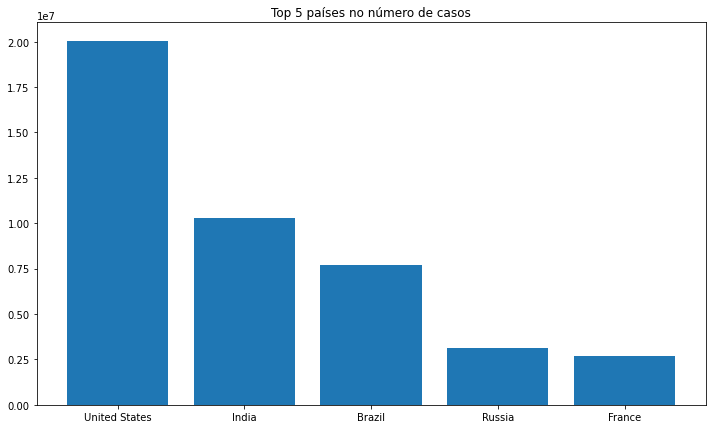

In [ ]:
# Top 5 paises no numero de casos
top_5_cases = df.loc[df.date == '2020-12-31', ['location', 'total_cases']].sort_values(by="total_cases", ascending=False)[1:13]
top_5_cases.reset_index(inplace=True)
top_5_cases.drop([0, 1, 2, 4, 5, 9, 11], inplace=True)
fig, ax = plt.subplots(figsize=(10,6))

ax.bar('location', 'total_cases', data=top_5_cases)

plt.tight_layout()
plt.title('Top 5 países no número de casos');

Dessa forma, temos na lista Estados Unidos em primeiro lugar, com cerca de 20 milhões de casos, seguido por Índia, Brasil, Rússia e França.  

Abaixo temos um fato interessante de ser comentado, a comparação do número de casos do EUA com a União Europeia e a América do Sul. Nela, vemos que os EUA sozinhos, tiveram mais casos do que toda a União Europeia e a América do Sul.

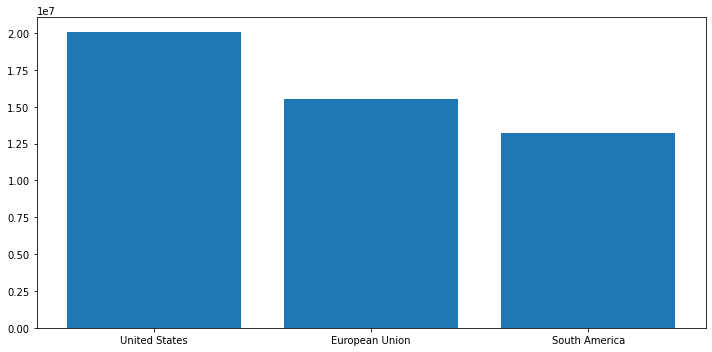

In [ ]:
# gráfico de barras para total de mortes
cases_EUA_2020 = df.loc[df.date == '2020-12-31', ['location', 'total_cases']].sort_values(by="total_cases", ascending=False)[1:10]
cases_EUA_2020.reset_index(inplace=True)
cases_EUA_2020.drop([0,1,2,6,7,8], inplace=True)
fig, ax = plt.subplots(figsize=(10,5))

ax.bar('location', 'total_cases', data=cases_EUA_2020)

plt.tight_layout()

Vamos ver os 5 países que possuem o maior número de mortes por covid.

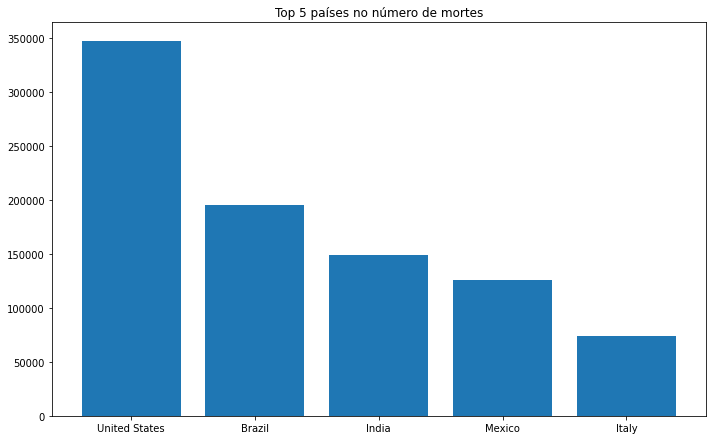

In [ ]:
# Top 5 paises no numero de mortes
top_5_death = df.loc[df.date == '2020-12-31', ['location', 'total_deaths']].sort_values(by="total_deaths", ascending=False)[1:13]
top_5_death.reset_index(inplace=True)
top_5_death.drop([0, 1, 2, 3, 5, 10,11], inplace=True)
fig, ax = plt.subplots(figsize=(10,6))

ax.bar('location', 'total_deaths', data=top_5_death)

plt.tight_layout()
plt.title('Top 5 países no número de mortes');

Por fim, verificamos que os Estados Unidos também lideram a lista dos países com a maior quantidade de mortes, seguido por Brasil, Índia, Mexico e Itália.

Fazendo a comparação entre casos/mortes, podemos afirmar que apesar de ter mais casos que o Brasil a Índia possui uma quantidade menor de mortes.  


#### Desenvolvimento de um país

Ao fim da análise de 2020, vamos verificar a relação entre o IDH e a Expectativa de vida com o número de casos/mortes.  

##### IDH

Pelos gráficos abaixo, percebemos uma alta quantidade de casos/mortes para os países cujo IDH converge para 1, mas isso se dá por conta dos grandes números dos EUA. Por outro lado, podemos levar em consideração os outros picos, os quais são para os países de IDH de aproximadamente 0.65 e 0.78.  

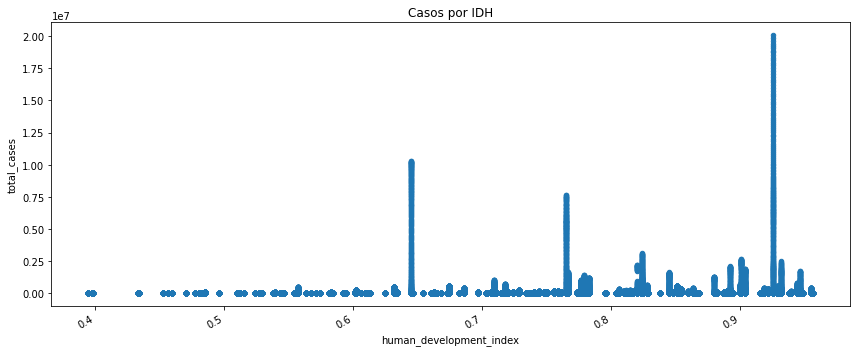

In [ ]:
#Casos por idh
fig, ax = plt.subplots(figsize=(12,5))
df_2020.plot.scatter(x="human_development_index", y="total_cases", ax=ax)
plt.title('Casos por IDH');
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

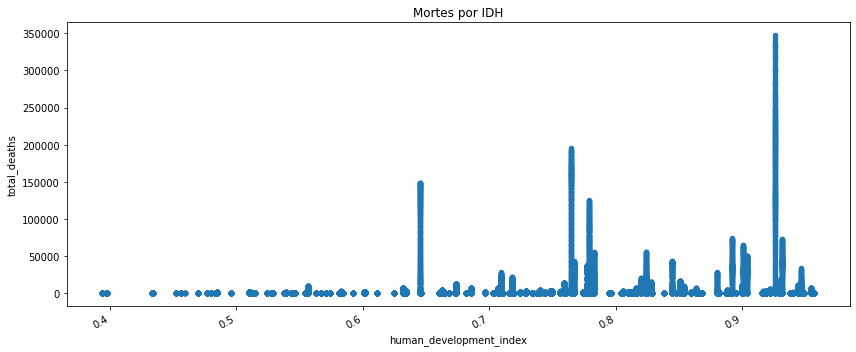

In [ ]:
#Mortes por idh
fig, ax = plt.subplots(figsize=(12,5))
df_2020.plot.scatter(x="human_development_index", y="total_deaths", ax=ax)
plt.title('Mortes por IDH');
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

##### Expectativa de Vida

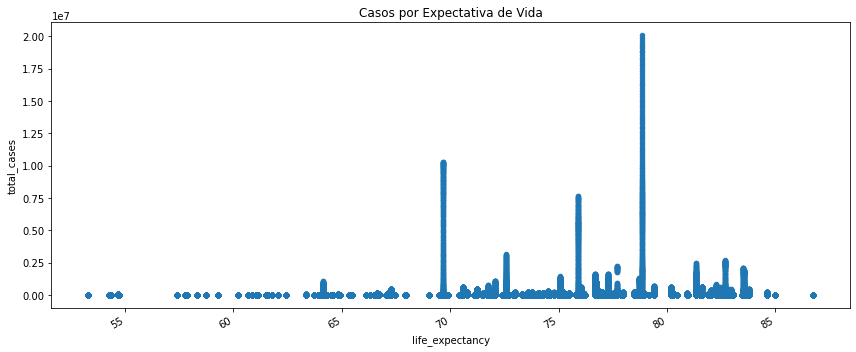

In [ ]:
#Casos por Expectativa de Vida
fig, ax = plt.subplots(figsize=(12,5))
df_2020.plot.scatter(x="life_expectancy", y="total_cases", ax=ax,)
plt.title('Casos por Expectativa de Vida');
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

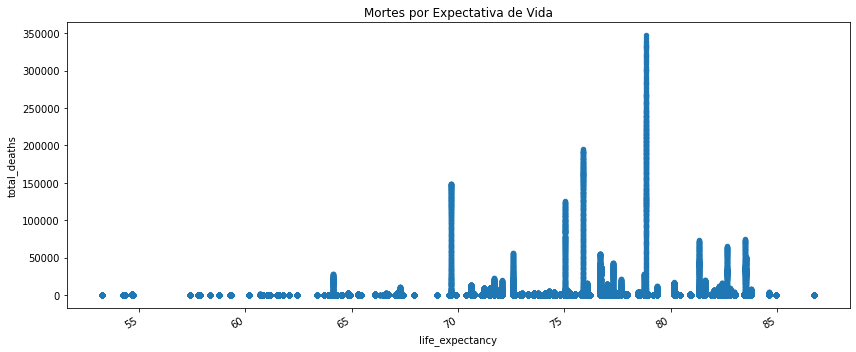

In [ ]:
#Mortes por Expectativa de Vida
fig, ax = plt.subplots(figsize=(12,5))
df_2020.plot.scatter(x="life_expectancy", y="total_deaths", ax=ax)
plt.title('Mortes por Expectativa de Vida');
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

Assim, a quantidade de casos/mortes foi maior nos países cuja expectativa de vida é de 70 ou 75 ou 79 anos.

Com isso, só falta analisar mais uma coisa, a qual seja talvez a mais importante. 

Sim! Isso mesmo, estou falando das Vacinas. 

A seguir, vamos ver fazer uma inspeção nos dados e retirar alguns fatos.

## Vacina

A primeira coisa que vamos verificar é o primeiro dia em que as vacinas foram aplicadas.

In [ ]:
# Ver a data da pimeira vacina
df_vac = df.copy()
df_vac.dropna(subset=['people_vaccinated'], axis=0, inplace=True)
df_vac.sort_values(by="date", ascending=True).head(1)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,mes,ano
67500,OWID_WRL,NaN,World,2020-12-13,72409307.0,544274.0,624712.286,1613986.0,7454.0,10946.143,9289.439,69.825,80.145,207.059,0.956,1.404,1.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86215.0,86215.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737,12,2020


Logo, a primeira vacina registrada no nosso dataset foi na União Europeia dia 13/12/2020!!!

A seguir, vamos conferir a quantidade de vacinas produzidas, além da distribuição por mês.

In [ ]:
# Total de vacinadas produzidas
print('Até hoje, {:.0f} vacinas foram produziadas!'.format(df_vac.total_vaccinations.values[-1]))

Até hoje, 165749550 vacinas foram produziadas!


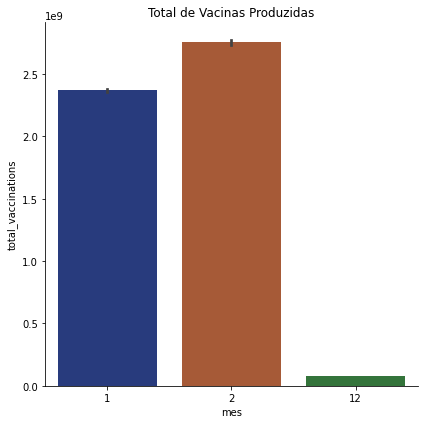

In [ ]:
# Total de vacinas produzidas por mes
sns.catplot(x="mes", y="total_vaccinations", estimator=sum ,kind="bar", ci="sd", palette="dark", alpha=.9, height=6, data=df_vac);
plt.title('Total de Vacinas Produzidas');
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

Agora, queremos ver a quantidade de pessoas vacinadas até o dia 11/02/2020.

In [ ]:
# Total de pessoas vacinadas registradas
print('Até hoje, {} pessoas foram vacinadas!'.format(df_vac.people_vaccinated.values[-1]))

Até hoje, 84428181.0 pessoas foram vacinadas!


E das 78634201, vemos abaixo como foi a distribuição com relação aos meses.

O mês de dezembro de 2020 com poucas pessoas vacinadas ainda, e embora só tenhamos os dados até dia 11/02, a quantidade de pessoas vacinadas em fevereiro já está quase passando o número de janeiro, o que é uma grande vitória para a humanidade!

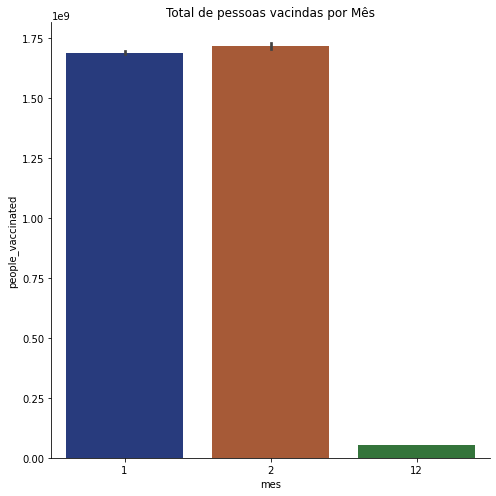

In [ ]:
# Total de pessoas vacinadas por Mês 
sns.catplot(x="mes", y="people_vaccinated", estimator=sum, kind="bar", ci="sd", palette="dark", alpha=.9, height=7, data=df_vac);
plt.title('Total de pessoas vacindas por Mês');
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

Por último, iremos verificar os dados das que pessoas que foram totalmente vacinadas, ou seja, tomaram duas vacinas!

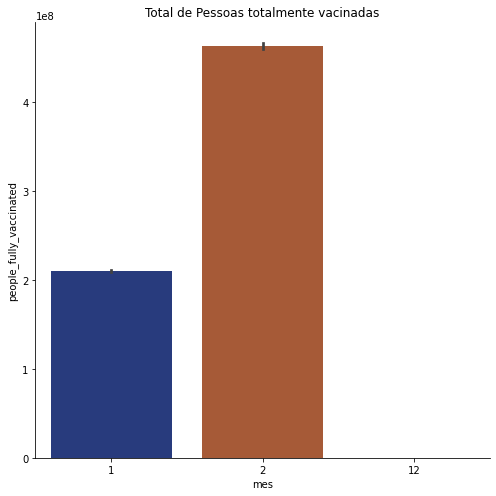

In [ ]:
# Pessoas totalmente vacinadas
sns.catplot(x="mes", y="people_fully_vaccinated", estimator=sum ,kind="bar", ci="sd", palette="dark", alpha=.9, height=7, data=df_vac);
plt.title('Total de Pessoas totalmente vacinadas');
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

Vemos então que na sequência temporal dos meses, o número de pessoas totalmente vacinadas está subindo cada vez mais, o que é uma ótima notícia!

## Análise do Mundo em 2021

Por último, iremos fazer uma breve análise dos dados de 2021 e compará-los com os do mês de dezembro para saber se na virada do ano os casos continuam aumentando.

Primeiramente, vamos ver a quantidade de casos/mortes de janeiro e fevereiro (até o dia disponível do dataset).

In [ ]:
#Total de novos casos de janeiro de 2021
print('O número total de novos casos/mortes de janeiro de 2021 foi de {:.0f} casos e {:.0f} mortes!'.format(df_2021[df_2021['mes']==1].new_cases.sum(), df_2021[df_2021['mes']==1].new_deaths.sum()))

O número total de novos casos/mortes de janeiro de 2021 foi de 42979716 casos e 919218 mortes!


In [ ]:
#Total de novos casos de fevereiro ate o dia 13/02/2021
print('O número total de novos casos de  fevereiro ate o dia 13/02/2021 foi de {:.0f} casos e {:.0f} mortes!'.format(df_2021[df_2021['mes']==2].new_cases.sum(), df_2021[df_2021['mes']==2].new_deaths.sum()))

O número total de novos casos de  fevereiro ate o dia 13/02/2021 foi de 11713166 casos e 346087 mortes!


Logo, até agora em 2021, tivemos 79.360.858 casos e 1.828.286 mortes! 

A seguir, veremos os mesmos dados para o mês de dezembro de 2020 com o intuito de compará-los com os dados do mês de janeiro de 2021.

In [ ]:
print('O número total de novos casos/mortes de dezembro de 2020 foi de {:.0f} casos e {:.0f} mortes!'.format(df_2020[df_2020['mes']==12].new_cases.sum(), df_2020[df_2020['mes']==12].new_deaths.sum()))

O número total de novos casos/mortes de dezembro de 2020 foi de 42530807 casos e 803582 mortes!


Assim, percebemos que, infelizmente, a virada do ano não impediu o crescimento dos casos e das mortes causadas por covid.

Em seguida, queremos verificar se a Europa ainda continua sendo a líder de casos/mortes do mundo. Para isso, vamos plotar 2 gráficos...

Em 2021, a América do Norte teve o maior número de casos, com 8512316 casos!


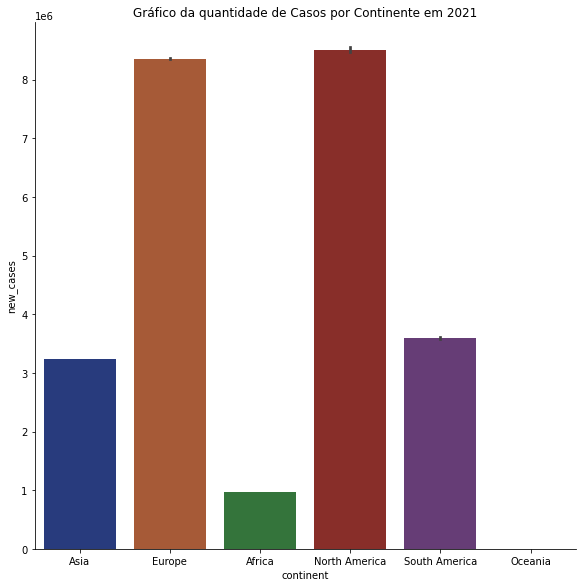

In [ ]:
# Total de casos de 2021 em cada continente
print('Em 2021, a América do Norte teve o maior número de casos, com {:.0f} casos!'.format(df_2021[df_2021['continent']=='North America'].new_cases.sum())) 
sns.catplot(x="continent", y="new_cases", estimator=sum ,kind="bar",  ci="sd", palette="dark", alpha=.9, height=8, data=df_2021);
plt.title('Gráfico da quantidade de Casos por Continente em 2021');

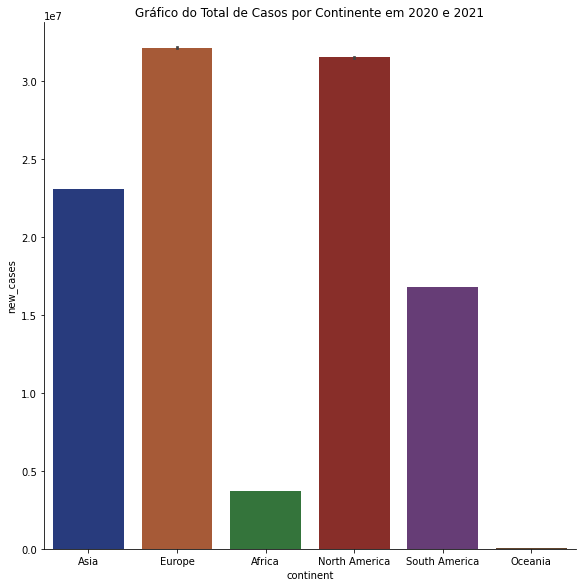

In [ ]:
# Total de casos de 2020 e 2021 em cada continente
sns.catplot(x="continent", y="new_cases", estimator=sum ,kind="bar",  ci="sd", palette="dark", alpha=.9, height=8, data=df);
plt.title('Gráfico do Total de Casos por Continente em 2020 e 2021');

Em 2021, a América do Norte teve o maior número de mortes, com 216458 mortes!


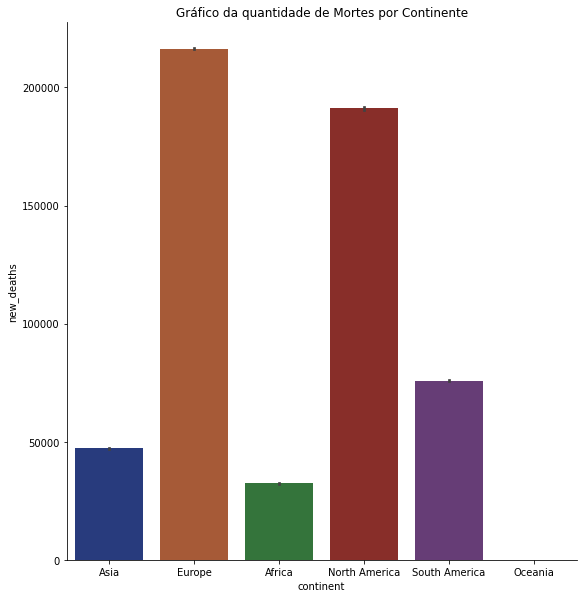

In [ ]:
# Total de mortes de 2021 em cada continente
print('Em 2021, a América do Norte teve o maior número de mortes, com {:.0f} mortes!'.format(df_2021[df_2021['continent']=='Europe'].new_deaths.sum())) 
sns.catplot(x="continent", y="new_deaths", estimator=sum ,kind="bar",  ci="sd", palette="dark", alpha=.9, height=8, data=df_2021);
plt.title('Gráfico da quantidade de Mortes por Continente');

Portanto, vemos que (muito por conta dos EUA) a América do Norte passou a Europa e se tornou o continente com o maior número de novos casos, porém a Europa continuando sendo o líder no quesito quantidade de casos e mortes!

Uma observação final sobre a gravidade do número de casos dos EUA, podemos ver pelo gráfico abaixo que sozinhos em 2021 já possuem mais casos que toda a Ásia!!! 

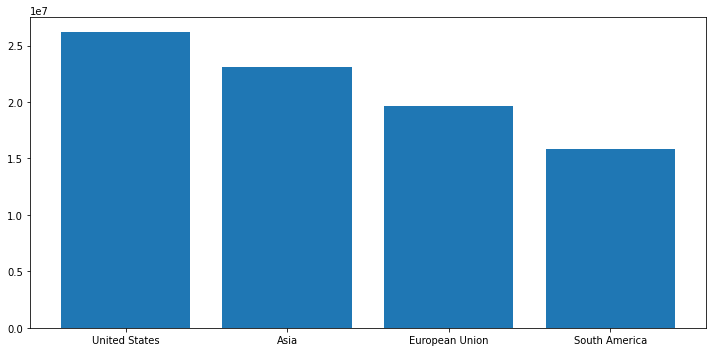

In [ ]:
# gráfico de barras para total de mortes
cases_EUA = df.loc[df.date == '2021-01-31', ['location', 'total_cases']].sort_values(by="total_cases", ascending=False)[1:7]
cases_EUA.reset_index(inplace=True)
cases_EUA.drop([0,1], inplace=True)
fig, ax = plt.subplots(figsize=(10,5))

ax.bar('location', 'total_cases', data=cases_EUA)

plt.tight_layout()
# E no ultimo dia de Janeiro de 2021,  EUA ja tem um numero total de casos maior que o da india!

## Analise do Brasil


Ao fim, deste projeto vamos agora ver uma análise especifica para o Brasil.

Primeiramente, vamos criar um subdataframe só com os dados do Brasil.


In [ ]:
# Criar um subdataframe só com os dados do Brasil
df_brasil_2020 = df_2020.loc["Brazil"].sort_values(by="total_cases", ascending=True).copy()
df_brasil_2021 = df_2021.loc["Brazil"].sort_values(by="total_cases", ascending=True).copy()

Criado o subdataset, queremos agora visualizar qual foi a primeira ocorrência de covid registrada no nosso país.

In [ ]:
df_brasil_2020.head(1)

,iso_code,continent,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,mes,ano
location,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Brazil,BRA,South America,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,2,2020


Logo, tivemos o primeiro caso registrado no brasil no dia 26/02/2020!

Na sequência, vamos verificar como ficou a distribuição dos casos e das mortes no Brasil durante 2020.

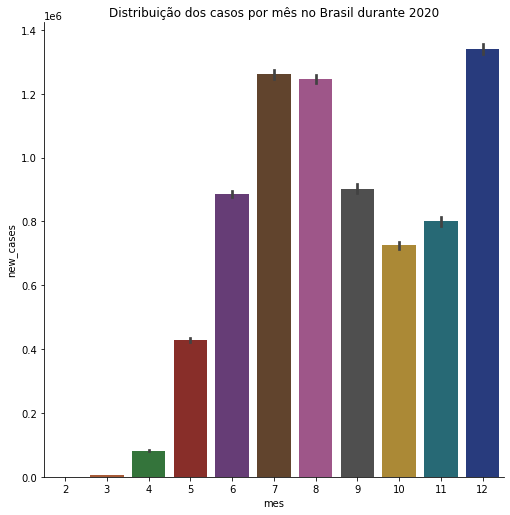

In [ ]:
sns.catplot(x="mes", y="new_cases", estimator=sum ,kind="bar", ci="sd", palette="dark", alpha=.9, height=7,data=df_brasil_2020);
plt.title("Distribuição dos casos por mês no Brasil durante 2020");

Diante do gráfico acima, percebemos que, em comparação com o gráfico do mundo visto anteriormente, o vírus demorou a chegar no Brasil. Aqui, tivemos nosso primeiro pico da covid entre maio e junho. 

Outro fato, a ser percebido, é que também ao contrário do mundo, no Brasil os números de casos não cresceram constantemente, como se pode perceber tivemos uma crescente até julho, porém os números de casos de agosto, setembro, outubro e novembro foram menores.

Por outro lado, como podemos ver abaixo, o numero de novos casos cresceu de dezembro para janeiro.

In [ ]:
print('O número total de novos casos de dezembro de 2020 foi de {:.0f} casos !'.format(df_brasil_2020[df_brasil_2020['mes']==12].new_cases.sum()))
print('O número total de novos casos de janeiro de 2021 foi de {:.0f} casos !'.format(df_brasil_2021[df_brasil_2021['mes']==1].new_cases.sum()))

O número total de novos casos de dezembro de 2020 foi de 1340095 casos !
O número total de novos casos de janeiro de 2021 foi de 1528758 casos !


Visto isso, iremos observar a  distribuição das mortes por mês.

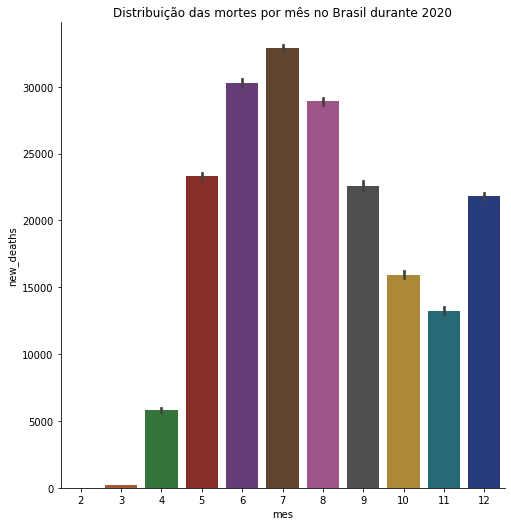

In [ ]:
sns.catplot(x="mes", y="new_deaths", estimator=sum, kind="bar", ci="sd", palette="dark", alpha=.9, height=7,data=df_brasil_2020);
plt.title("Distribuição das mortes por mês no Brasil durante 2020");

Com o gráfico acima, é perceptível que a distribuição das mortes por mês é bem parecida que com a de casos. Em julho tivemos a maior quantidade de mortes de 2020, nos meses seguintes a quantidade foi diminuindo constantemente até novembro, porém em dezembro com o aumento dos casos, a quantidade de mortes também aumentou.  

Abaixo faremos a comparação para ver se o número de casos/mortes aumentou de dezembro para janeiro.

In [ ]:
print('O número total de novas mortes de dezembro de 2020 foi de {:.0f} mortes !'.format(df_brasil_2020[df_brasil_2020['mes']==12].new_deaths.sum()))
print('O número total de novas mortes de janeiro de 2021 foi de {:.0f} mortes !'.format(df_brasil_2021[df_brasil_2021['mes']==1].new_deaths.sum()))

O número total de novas mortes de dezembro de 2020 foi de 21829 mortes !
O número total de novas mortes de janeiro de 2021 foi de 29555 mortes !


Ou seja, a quantidade de mortes aumentou também!

Por último, iremos visualizar os dados relacionados as vacinas no Brasil.

 Vamos ver a quantidade de vacinas que temos e o total de pessoas parcialemente vacinadas e totalmente vacinadas.

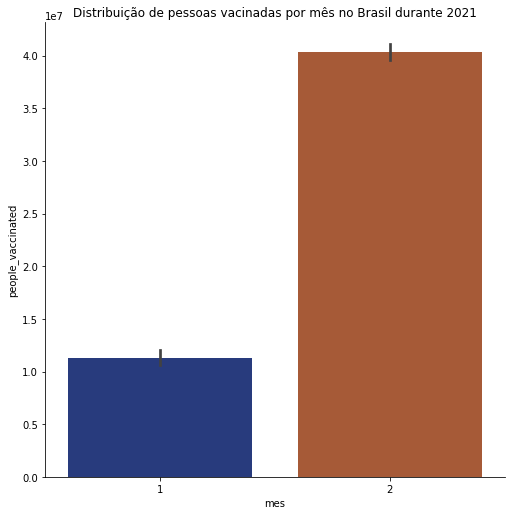

In [ ]:
# Total de pessoas vacinadas por mês no Brasil durante 2021
sns.catplot(x="mes", y="people_vaccinated", estimator=sum ,kind="bar", ci="sd", palette="dark", alpha=.9, height=7,data=df_brasil_2021);
plt.title("Distribuição de pessoas vacinadas por mês no Brasil durante 2021");

Assim, vemos que embora só tenhamos dados ate dia 12/02/2021, no mês de fevereiro já houveram mais pessoas vacinadas do que em janeiro.

Iremos ver agora os dados das pessoas totalmente vacinadas.

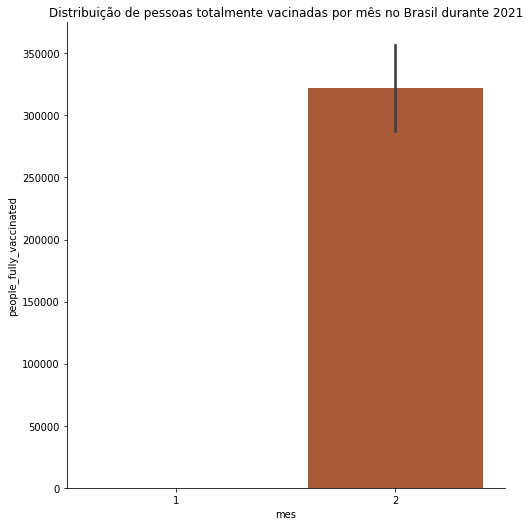

In [ ]:
# Total de novos casos por mes
sns.catplot(x="mes", y="people_fully_vaccinated", estimator=sum ,kind="bar", ci="sd", palette="dark", alpha=.9, height=7,data=df_brasil_2021);
plt.title("Distribuição de pessoas totalmente vacinadas por mês no Brasil durante 2021");

In [ ]:
# Pessoas totalmente vacinadas em janeiro
df_brasil_2021[df_brasil_2021['mes']==1].people_fully_vaccinated.sum()

0.0

In [ ]:
# Pessoas totalmente vacinadas em fevereiro
df_brasil_2021[df_brasil_2021['mes']==2].people_fully_vaccinated.sum()

322224.0

Assim, vimos que ninguém foi totalmente vacinado em janeiro aqui no Brasil, porém em fevereiro já temos 322224 pessoas totalmente vacinadas!

Ao fim, iremos ver o total de vacinas do Brasil.

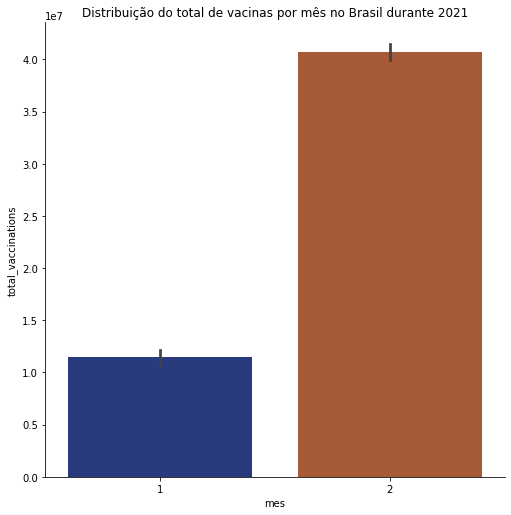

In [ ]:
# Total de novos casos por mes
sns.catplot(x="mes", y="total_vaccinations", estimator=sum ,kind="bar", ci="sd", palette="dark", alpha=.9, height=7,data=df_brasil_2021);
plt.title("Distribuição do total de vacinas por mês no Brasil durante 2021");

## Conclusão

Dessa forma, chegamos ao final do nosso projeto.

No primeiro momento, analisamos a quantidade de casos/mortes nos países em 2020 a partir dos gráficos abaixo:

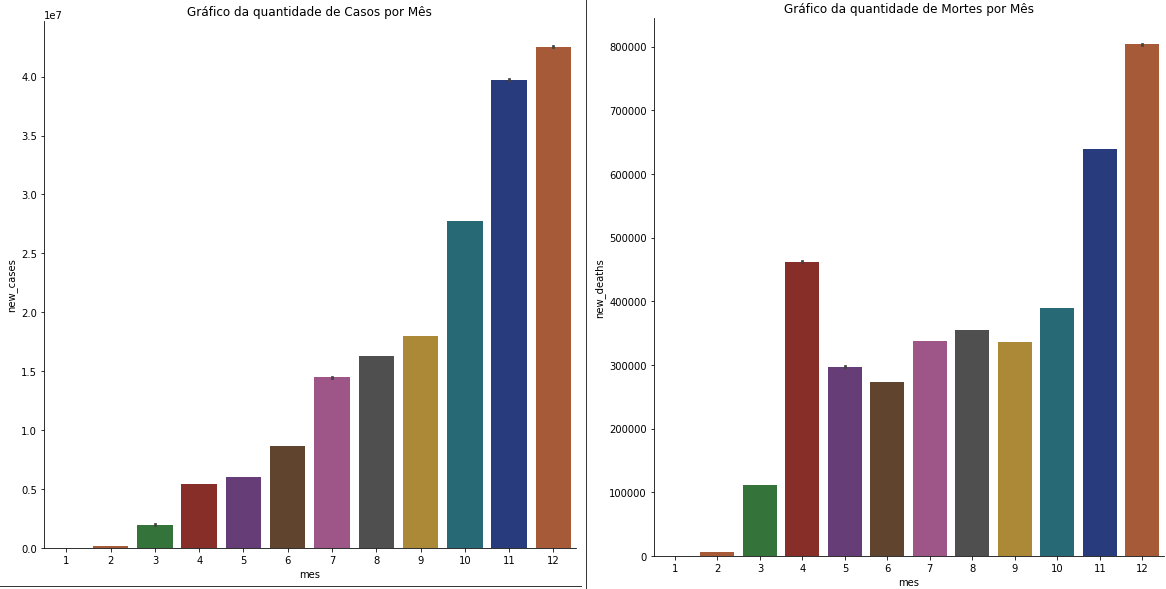

Com eles, conseguimos afirmar que o número de casos subiu constantemente com o passar dos meses, enquanto a quantidade de mortes teve uma variação.

Posteriormente, vimos alguns dados dos hospitais e como ficou a lotação dele durante 2020, como podemos ver no gráfico abaixo.

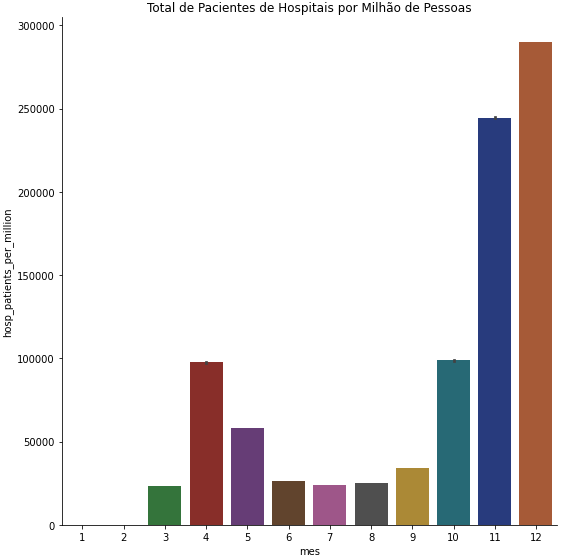

Além disso, verificamos qual continente teve mais casos de covid em 2020 e em 2021, sendo a Europa como vemos abaixo.

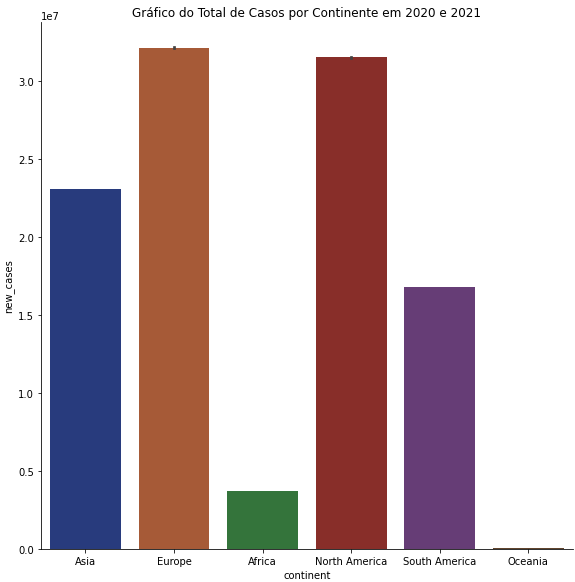

Na sequência, mostramos que até hoje, 84428181.0 pessoas foram vacinadas!

E por fim, vimos que comparado a dezembro de 2020, janeiro de 2021 teve números de casos/mortes mais altos o que é um problema!

Com isso, espero ter conseguido chamar sua atenção para o problema que a covid ainda ee para todo ser humano. Vimos ao fim, que os números voltaram a crescer em janeiro desse ano e logo temos que redobrar nossos cuidados todos os dias.

Lavem as mãos, usem álcool em gel e máscara!

“E por hoje e só pessoal!”
